# Installing Requirements

In [1]:
%%bash
set -e

# Upgrade pip
python -m pip install --upgrade pip

# Core PyTorch
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Essential libraries
pip install opencv-python matplotlib pillow requests numpy tqdm wget gitpython
pip install transformers accelerate supervision addict yacs timm einops pycocotools
pip install hydra-core omegaconf yaspin yapf iopath fvcore fairscale

# Install GroundingDINO dependencies
pip install groundingdino-py

# Clone SAM2 repository (we need the original SAM2 implementation)
if [ ! -d "segment-anything-2" ]; then
  git clone https://github.com/facebookresearch/segment-anything-2.git
fi

# Install SAM2 in editable mode
cd segment-anything-2 && pip install -e . && cd ..

# Clone GroundingDINO for config files
if [ ! -d "GroundingDINO" ]; then
  git clone https://github.com/IDEA-Research/GroundingDINO.git
fi

echo "✅ All packages installed successfully."



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cu118
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=d4acf7d487c6b9bfb99cc07f6fee811aa5cada77d902350a93da67641976d364
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel:

  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'iopath' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'iopath'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'fvcore' using the legacy setup.py bdist_wheel mechanism, which will

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
%%bash
set -e

# Upgrade pip
python -m pip install --upgrade pip

# Core PyTorch
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Essential libraries
pip install opencv-python matplotlib pillow requests numpy tqdm wget gitpython
pip install transformers accelerate supervision addict yacs timm einops pycocotools
pip install hydra-core omegaconf yaspin yapf iopath fvcore fairscale

# --- UPDATED: Install clipseg directly from GitHub ---
pip install git+https://github.com/timojl/clipseg.git

# Clone SAM2 repository (we need the original SAM2 implementation)
if [ ! -d "segment-anything-2" ]; then
  git clone https://github.com/facebookresearch/segment-anything-2.git
fi

# Install SAM2 in editable mode
cd segment-anything-2 && pip install -e . && cd ..

echo "✅ All packages installed successfully."

Looking in indexes: https://download.pytorch.org/whl/cu118
  Cloning https://github.com/timojl/clipseg.git to /tmp/pip-req-build-_6p57igj
  Resolved https://github.com/timojl/clipseg.git to commit 77c4e2dc853880df46413d4a870a725e961f2f73
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-bg00wv5i/clip_3028c1c462aa4bdc87d208ddfbaf8d8b
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for clipseg: filename=clipseg-0.0.1-py3-none-any.whl size=12322 sha256=16db6b39ee9aacdbb7a90b456ca365332dffef1c43dde3b8cfd5e712604b2020
  Stored in directory: /tmp/pip-ephem-wheel-cache-pyvh556a/wheels/40/b2/a3/b36341c50827e30297e73f4b557a1493a1b61f39ca02a0afe6
  Created wheel for CLIP: filename=clip-1.0-py3-none-any.whl size=13694

  Running command git clone --filter=blob:none --quiet https://github.com/timojl/clipseg.git /tmp/pip-req-build-_6p57igj
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-bg00wv5i/clip_3028c1c462aa4bdc87d208ddfbaf8d8b
  DEPRECATION: Building 'clipseg' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'clipseg'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'CLIP' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` opt

In [34]:

import os
import wget

os.makedirs("checkpoints", exist_ok=True)

def download_if_missing(url, dest):
    if os.path.exists(dest):
        print(f"✓ {os.path.basename(dest)} already exists")
        return
    print(f"Downloading {os.path.basename(dest)}...")
    wget.download(url, dest)
    print(f"\n✓ Downloaded {os.path.basename(dest)}")

# Download SAM2 checkpoint
download_if_missing(
    "https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt",
    "checkpoints/sam2.1_hiera_large.pt"
)

print("✅ All checkpoints ready.")


import sys
import torch
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Add SAM2 repository to path
sys.path.append('segment-anything-2')

# --- UPDATED: Import CLIPSeg instead of GroundingDINO ---
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device} (CUDA available: {torch.cuda.is_available()})")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()} | Memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

print("✅ All imports successful!")


import os
from hydra import initialize_config_dir
import hydra

class TextDrivenSegmenter:
    def __init__(self):
        self._verify_checkpoints()

        # --- Initialize SAM2 (No changes here) ---
        sam2_checkpoint = "checkpoints/sam2.1_hiera_large.pt"
        print("🔄 Initializing SAM2...")
        try:
            hydra.core.global_hydra.GlobalHydra.instance().clear()
            config_dir = os.path.abspath("segment-anything-2/sam2/configs")
            initialize_config_dir(config_dir=config_dir)
            config_name = "sam2.1/sam2.1_hiera_l"
            self.sam2_model = build_sam2(config_name, sam2_checkpoint, device=device)
            self.sam2_predictor = SAM2ImagePredictor(self.sam2_model)
            print("✅ SAM2 initialized successfully!")
        except Exception as e:
            print(f"❌ SAM2 initialization failed: {e}")
            raise

        # --- UPDATED: Initialize CLIPSeg ---
        print("🔄 Initializing CLIPSeg...")
        try:
            self.clip_processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
            self.clip_model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
            print("✅ CLIPSeg initialized successfully!")
        except Exception as e:
            print(f"❌ CLIPSeg initialization failed: {e}")
            raise
        print("🎉 TextDrivenSegmenter ready!")

    def _verify_checkpoints(self):
        required_files = ["checkpoints/sam2.1_hiera_large.pt"]
        if any(not os.path.exists(f) for f in required_files):
            raise FileNotFoundError("Missing SAM2 checkpoint file.")
        print("✅ All checkpoint files verified")

    def _load_image(self, image_input):
        if isinstance(image_input, str) and image_input.startswith("http"):
            response = requests.get(image_input)
            response.raise_for_status()
            return Image.open(BytesIO(response.content)).convert("RGB")
        elif isinstance(image_input, str):
            return Image.open(image_input).convert("RGB")
        elif isinstance(image_input, Image.Image):
            return image_input.convert("RGB")
        raise ValueError("Invalid image input type")

    def process_image(self, image_input, text_prompt, clip_threshold=0.5):
        print(f"🔍 Processing with prompt: '{text_prompt}'")
        try:
            img = self._load_image(image_input)
        except Exception as e:
            print(f"❌ Failed to load image: {e}")
            return None

        # --- New Pipeline Step 1: Get rough masks from CLIPSeg ---
        prompts = [p.strip() for p in text_prompt.split('.')]
        inputs = self.clip_processor(text=prompts, images=[img] * len(prompts), padding="max_length", return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = self.clip_model(**inputs)

        heatmaps = torch.sigmoid(outputs.logits)

        img_np = np.array(img)
        self.sam2_predictor.set_image(img_np)

        all_masks, all_scores, final_boxes, final_phrases = [], [], [], []

        for i, heatmap in enumerate(heatmaps):
            # --- New Pipeline Step 2: Create a reliable prompt from the rough mask ---
            # Resize heatmap to match image dimensions
            heatmap_resized = torch.nn.functional.interpolate(
                heatmap.unsqueeze(0).unsqueeze(0),
                size=(img.height, img.width),
                mode='bilinear',
                align_corners=False
            ).squeeze()

            # Threshold the heatmap to get a binary mask
            binary_mask = (heatmap_resized > clip_threshold).cpu().numpy().astype(np.uint8)

            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if not contours:
                print(f"⚠️ No object found by CLIPSeg for prompt: '{prompts[i]}'")
                continue

            # Find the largest contour and get its bounding box
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)
            sam_box_prompt = np.array([x, y, x + w, y + h])

            # --- New Pipeline Step 3: Refine the mask with SAM2 ---
            refined_masks, scores, _ = self.sam2_predictor.predict(
                box=sam_box_prompt,
                multimask_output=False
            )

            all_masks.append(refined_masks[0])
            all_scores.append(scores[0])
            final_boxes.append(sam_box_prompt)
            final_phrases.append(prompts[i])

        if not all_masks:
            print("⚠️ Mask generation failed for all prompts.")
            return None

        print(f"🎯 Generated {len(all_masks)} refined masks for objects: {final_phrases}")
        return {
            "image": img_np, "boxes": np.array(final_boxes), "masks": np.array(all_masks),
            "phrases": final_phrases, "scores": np.array(all_scores)
        }

print("🚀 Initializing TextDrivenSegmenter...")
segmenter = TextDrivenSegmenter()


import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_mask(mask, ax, random_color=False, alpha=0.6):
    color = np.concatenate([np.random.random(3), np.array([alpha])]) if random_color else np.array([0.12, 0.56, 1.0, alpha])
    h, w = mask.shape[-2:]
    ax.imshow(mask.reshape(h, w, 1) * color.reshape(1, 1, -1))

def show_box(box, ax, label=None):
    x0, y0, x1, y1 = box
    rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)
    if label:
        ax.text(x0, y0 - 5, str(label), fontsize=10, color='white', bbox=dict(boxstyle="round,pad=0.3", facecolor='lime', alpha=0.8))

def visualize_results(results, text_prompt):
    if not results:
        print("❌ No results to visualize")
        return

    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    plt.suptitle(f"Text-Driven Segmentation (CLIPSeg + SAM2)\nPrompt: '{text_prompt}'", fontsize=16, fontweight='bold')

    image, boxes, masks, phrases = results['image'], results['boxes'], results['masks'], results['phrases']

    axes[0].imshow(image); axes[0].set_title("1. Original Image"); axes[0].axis('off')

    axes[1].imshow(image)
    for box, phrase in zip(boxes, phrases): show_box(box, axes[1], phrase)
    axes[1].set_title("2. Region Seeds (from CLIPSeg)"); axes[1].axis('off')

    axes[2].imshow(image)
    for mask in masks: show_mask(mask, axes[2], random_color=True, alpha=0.5)
    for box, phrase in zip(boxes, phrases): show_box(box, axes[2], phrase)
    axes[2].set_title("3. Final Refined Masks (by SAM2)"); axes[2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

print("✅ Visualization functions ready!")


def segment_with_text_prompt(image_input, text_prompt, **kwargs):
    try:
        results = segmenter.process_image(image_input, text_prompt, **kwargs)
        if not results: return

        visualize_results(results, text_prompt)

        print(f"\n📊 Results Summary:")
        print(f"   • Objects found: {len(results['phrases'])}")
        print(f"   • Phrases: {', '.join(results['phrases'])}")
        if results.get('scores') is not None and len(results['scores']) > 0:
            print(f"   • Average mask confidence: {np.mean(results['scores']):.3f}")

    except Exception as e:
        print(f"❌ Error during processing: {e}")
        import traceback
        traceback.print_exc()

print("✅ Main processing function ready!")

✓ sam2.1_hiera_large.pt already exists
✅ All checkpoints ready.
Using device: cuda (CUDA available: True)
GPU: Tesla T4 | Memory: 14.7 GB
✅ All imports successful!
🚀 Initializing TextDrivenSegmenter...
✅ All checkpoint files verified
🔄 Initializing SAM2...


/tmp/ipython-input-1424908152.py:63: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  initialize_config_dir(config_dir=config_dir)
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


✅ SAM2 initialized successfully!
🔄 Initializing CLIPSeg...


preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/603M [00:00<?, ?B/s]

✅ CLIPSeg initialized successfully!
🎉 TextDrivenSegmenter ready!
✅ Visualization functions ready!
✅ Main processing function ready!



🧪 EXECUTING PIPELINE: EXAMPLE 1 (HORSE)
🔍 Processing with prompt: 'dog . person . grass'
⚠️ No object found by CLIPSeg for prompt: 'person'
⚠️ No object found by CLIPSeg for prompt: 'grass'
🎯 Generated 1 refined masks for objects: ['dog']


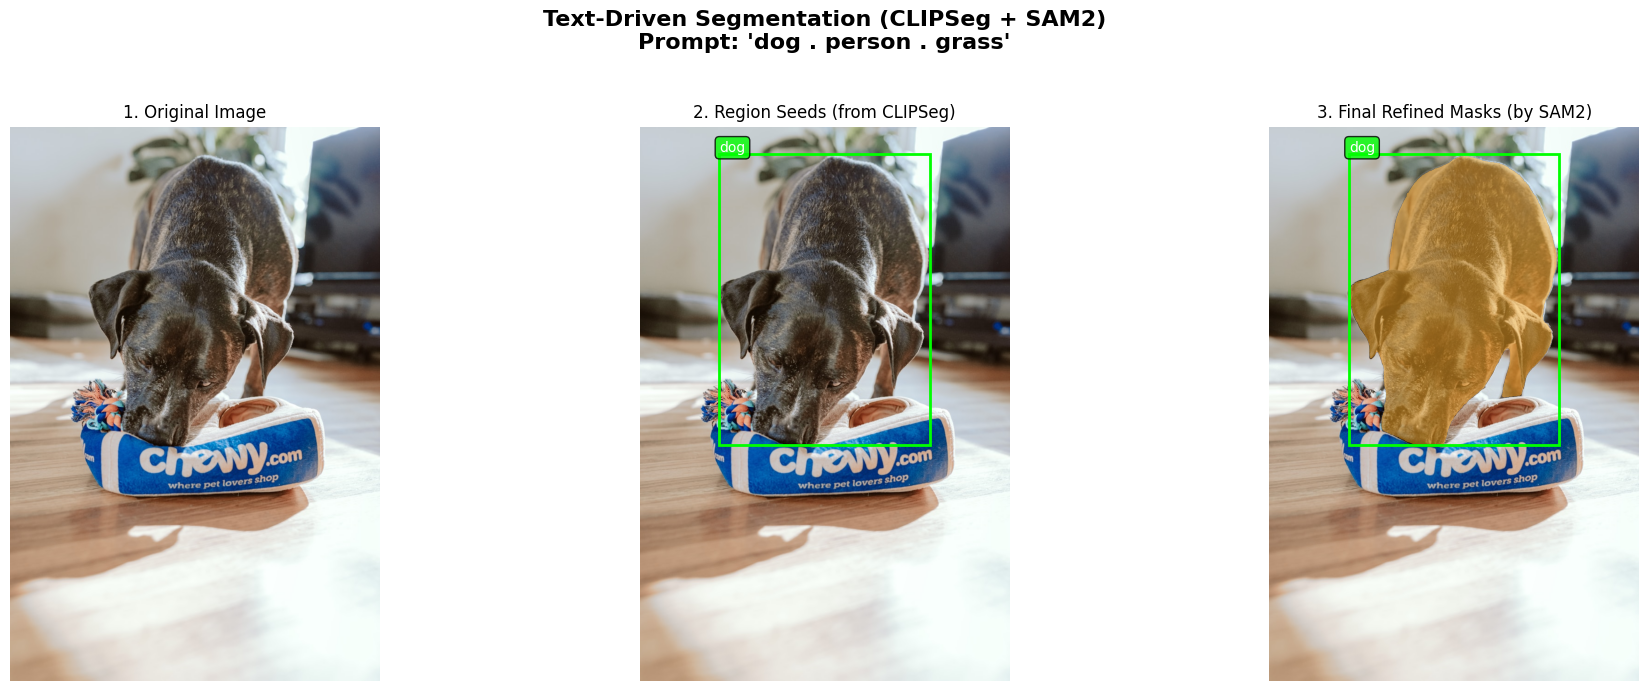


📊 Results Summary:
   • Objects found: 1
   • Phrases: dog
   • Average mask confidence: 0.992


In [41]:
# --- Main Execution ---
print("\n" + "="*70)
print("🧪 EXECUTING PIPELINE: EXAMPLE 1 (HORSE)")
print("="*70)
segment_with_text_prompt(
    "https://images.unsplash.com/photo-1601758228041-f3b2795255f1?w=800",
    "dog . person . grass"
)





# Interactive Segmentation


🎮 INTERACTIVE SEGMENTATION MODE
🖼️ Image path/URL (default provided):
   /content/drive/MyDrive/images/man.jpg
💬 Text prompt (default: 'person . dog'):
   person . car 
🔪 CLIPSeg Threshold [0-1] (default 0.5): 

🚀 Processing with CLIPSeg threshold: 0.5
🔍 Processing with prompt: 'person . car'


/usr/local/lib/python3.12/dist-packages/transformers/image_processing_utils.py:51: UserWarning: The following named arguments are not valid for `ViTImageProcessor.preprocess` and were ignored: 'padding'
  return self.preprocess(images, **kwargs)


🎯 Generated 2 refined masks for objects: ['person', 'car']


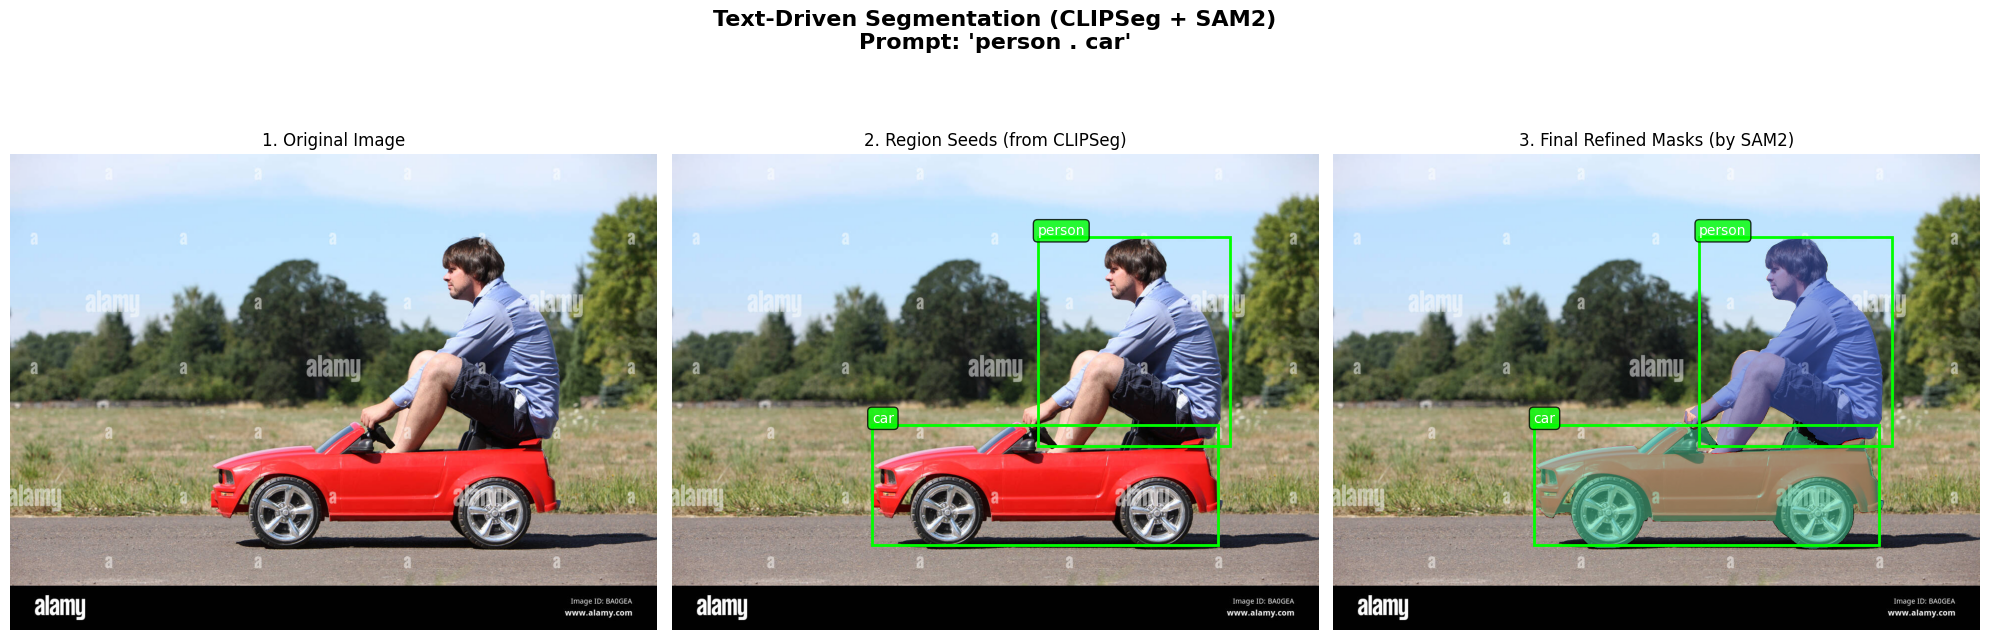


📊 Results Summary:
   • Objects found: 2
   • Phrases: person, car
   • Average mask confidence: 0.984


In [36]:
# --- Interactive Mode ---
def interactive_segmentation():
    print("\n" + "="*70)
    print("🎮 INTERACTIVE SEGMENTATION MODE")
    print("="*70)

    CLIP_THRESHOLD = 0.5

    default_image = "https://images.pexels.com/photos/1662303/pexels-photo-1662303.jpeg?auto=compress&cs=tinysrgb&w=800"
    default_prompt = "person . dog"

    image_input = input(f"🖼️ Image path/URL (default provided):\n   ").strip() or default_image
    text_input = input(f"💬 Text prompt (default: '{default_prompt}'):\n   ").strip() or default_prompt

    try:
        clip_thresh = float(input(f"🔪 CLIPSeg Threshold [0-1] (default {CLIP_THRESHOLD}): ").strip() or CLIP_THRESHOLD)
    except ValueError:
        print(f"   ⚠️ Invalid input. Using default threshold ({CLIP_THRESHOLD}).")
        clip_thresh = CLIP_THRESHOLD

    print(f"\n🚀 Processing with CLIPSeg threshold: {clip_thresh}")
    segment_with_text_prompt(
        image_input, text_input,
        clip_threshold=clip_thresh
    )

# To run, uncomment the line below in your notebook
interactive_segmentation()




🎮 INTERACTIVE SEGMENTATION MODE
🖼️ Image path/URL (default provided):
   /content/drive/MyDrive/images/bmw.jpg
💬 Text prompt (default: 'person . dog'):
   car
🔪 CLIPSeg Threshold [0-1] (default 0.5): 

🚀 Processing with CLIPSeg threshold: 0.5
🔍 Processing with prompt: 'car'
🎯 Generated 1 refined masks for objects: ['car']


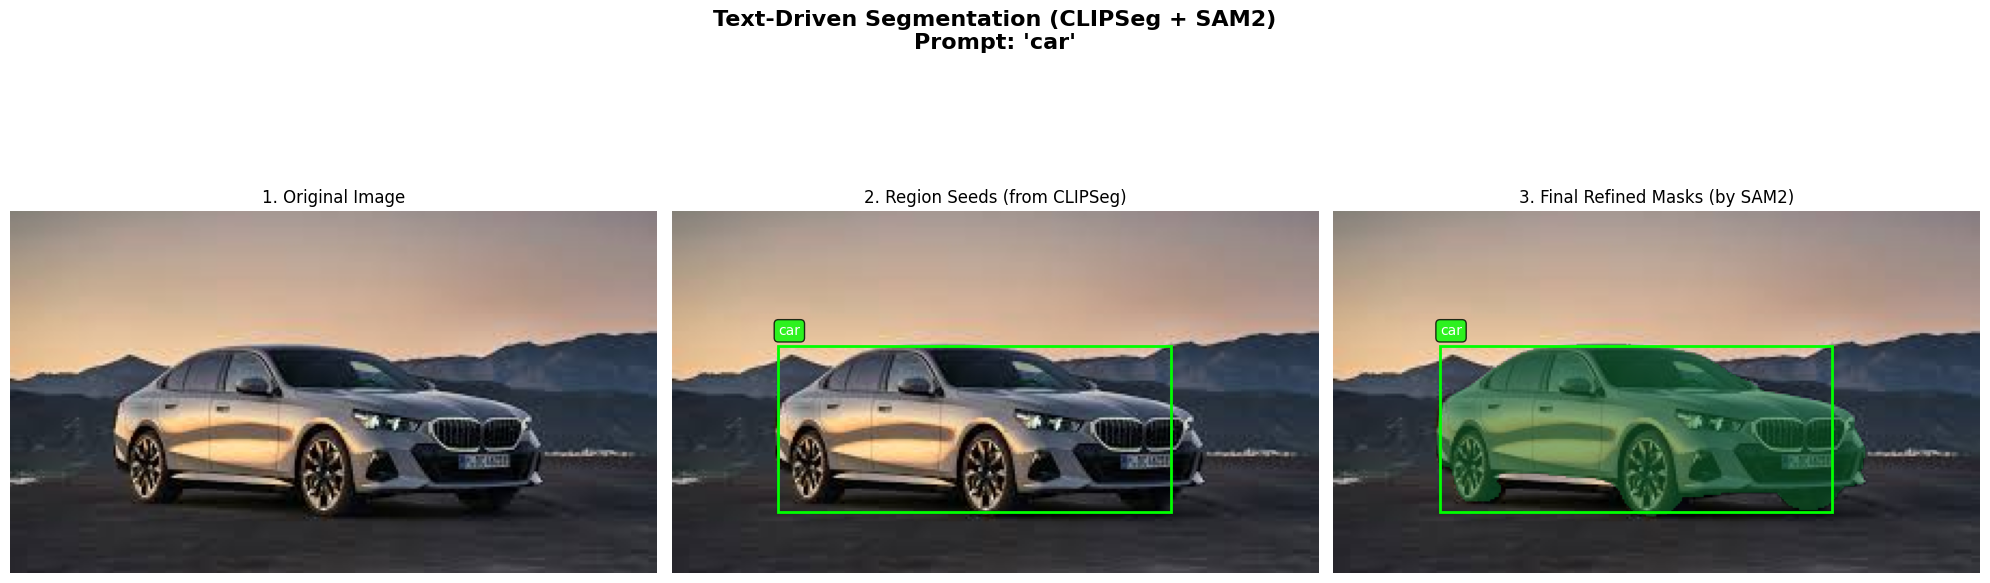


📊 Results Summary:
   • Objects found: 1
   • Phrases: car
   • Average mask confidence: 0.931


In [37]:
# --- Interactive Mode ---
def interactive_segmentation():
    print("\n" + "="*70)
    print("🎮 INTERACTIVE SEGMENTATION MODE")
    print("="*70)

    CLIP_THRESHOLD = 0.5

    default_image = "https://images.pexels.com/photos/1662303/pexels-photo-1662303.jpeg?auto=compress&cs=tinysrgb&w=800"
    default_prompt = "person . dog"

    image_input = input(f"🖼️ Image path/URL (default provided):\n   ").strip() or default_image
    text_input = input(f"💬 Text prompt (default: '{default_prompt}'):\n   ").strip() or default_prompt

    try:
        clip_thresh = float(input(f"🔪 CLIPSeg Threshold [0-1] (default {CLIP_THRESHOLD}): ").strip() or CLIP_THRESHOLD)
    except ValueError:
        print(f"   ⚠️ Invalid input. Using default threshold ({CLIP_THRESHOLD}).")
        clip_thresh = CLIP_THRESHOLD

    print(f"\n🚀 Processing with CLIPSeg threshold: {clip_thresh}")
    segment_with_text_prompt(
        image_input, text_input,
        clip_threshold=clip_thresh
    )

# To run, uncomment the line below in your notebook
interactive_segmentation()




🎮 INTERACTIVE SEGMENTATION MODE
🖼️ Image path/URL (default provided):
   /content/drive/MyDrive/images/horse.jpg
💬 Text prompt (default: 'person . dog'):
   horse 
🔪 CLIPSeg Threshold [0-1] (default 0.5): 

🚀 Processing with CLIPSeg threshold: 0.5
🔍 Processing with prompt: 'horse'
🎯 Generated 1 refined masks for objects: ['horse']


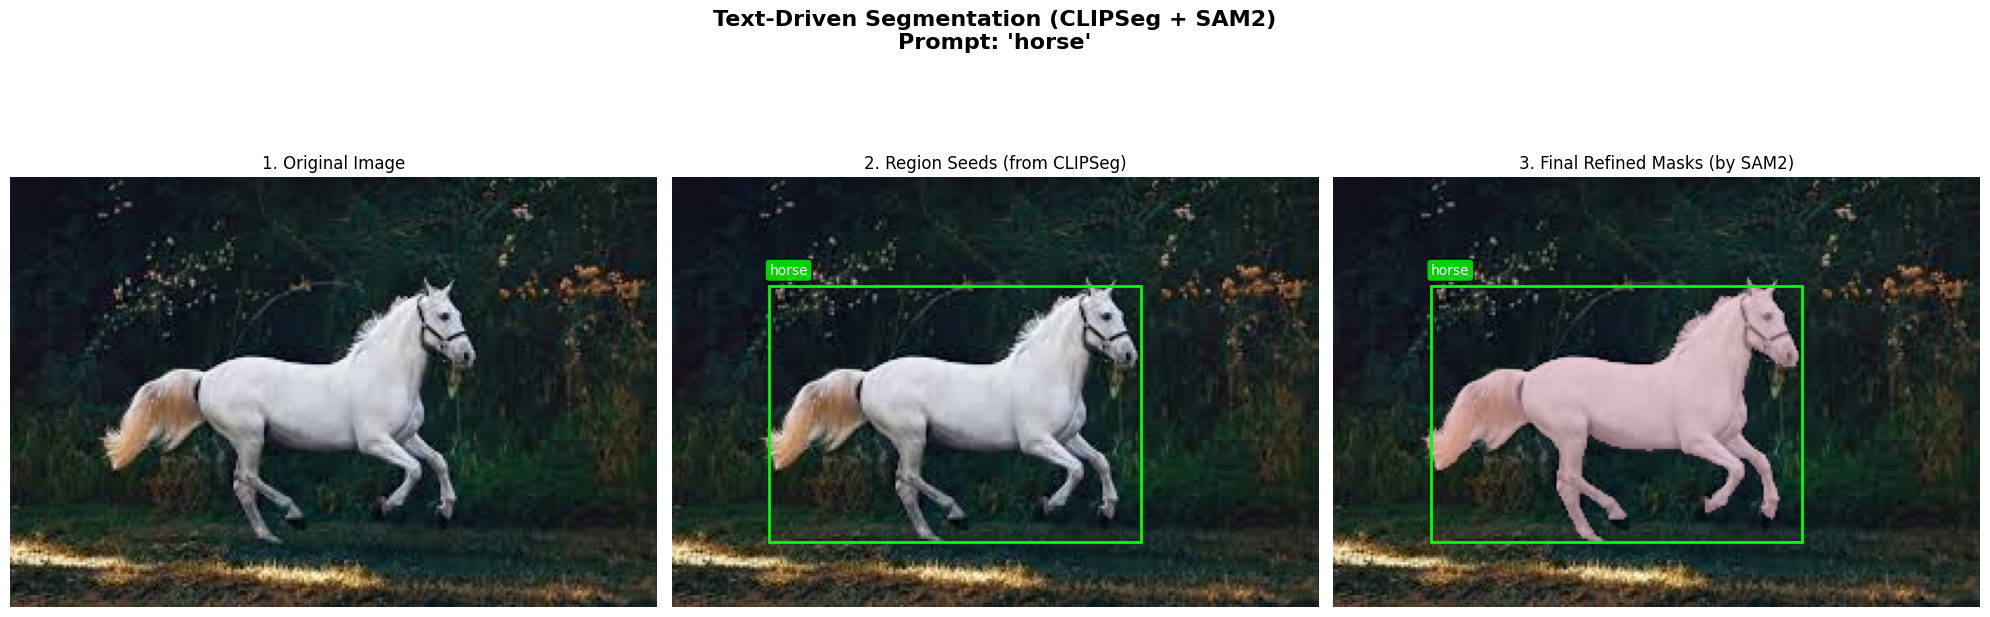


📊 Results Summary:
   • Objects found: 1
   • Phrases: horse
   • Average mask confidence: 0.970


In [38]:
# --- Interactive Mode ---
def interactive_segmentation():
    print("\n" + "="*70)
    print("🎮 INTERACTIVE SEGMENTATION MODE")
    print("="*70)

    CLIP_THRESHOLD = 0.5

    default_image = "https://images.pexels.com/photos/1662303/pexels-photo-1662303.jpeg?auto=compress&cs=tinysrgb&w=800"
    default_prompt = "person . dog"

    image_input = input(f"🖼️ Image path/URL (default provided):\n   ").strip() or default_image
    text_input = input(f"💬 Text prompt (default: '{default_prompt}'):\n   ").strip() or default_prompt

    try:
        clip_thresh = float(input(f"🔪 CLIPSeg Threshold [0-1] (default {CLIP_THRESHOLD}): ").strip() or CLIP_THRESHOLD)
    except ValueError:
        print(f"   ⚠️ Invalid input. Using default threshold ({CLIP_THRESHOLD}).")
        clip_thresh = CLIP_THRESHOLD

    print(f"\n🚀 Processing with CLIPSeg threshold: {clip_thresh}")
    segment_with_text_prompt(
        image_input, text_input,
        clip_threshold=clip_thresh
    )

# To run, uncomment the line below in your notebook
interactive_segmentation()




🎮 INTERACTIVE SEGMENTATION MODE
🖼️ Image path/URL (default provided):
   /content/drive/MyDrive/images/man2.jpg
💬 Text prompt (default: 'person . dog'):
   cars . person
🔪 CLIPSeg Threshold [0-1] (default 0.5): 

🚀 Processing with CLIPSeg threshold: 0.5
🔍 Processing with prompt: 'cars . person'
🎯 Generated 2 refined masks for objects: ['cars', 'person']


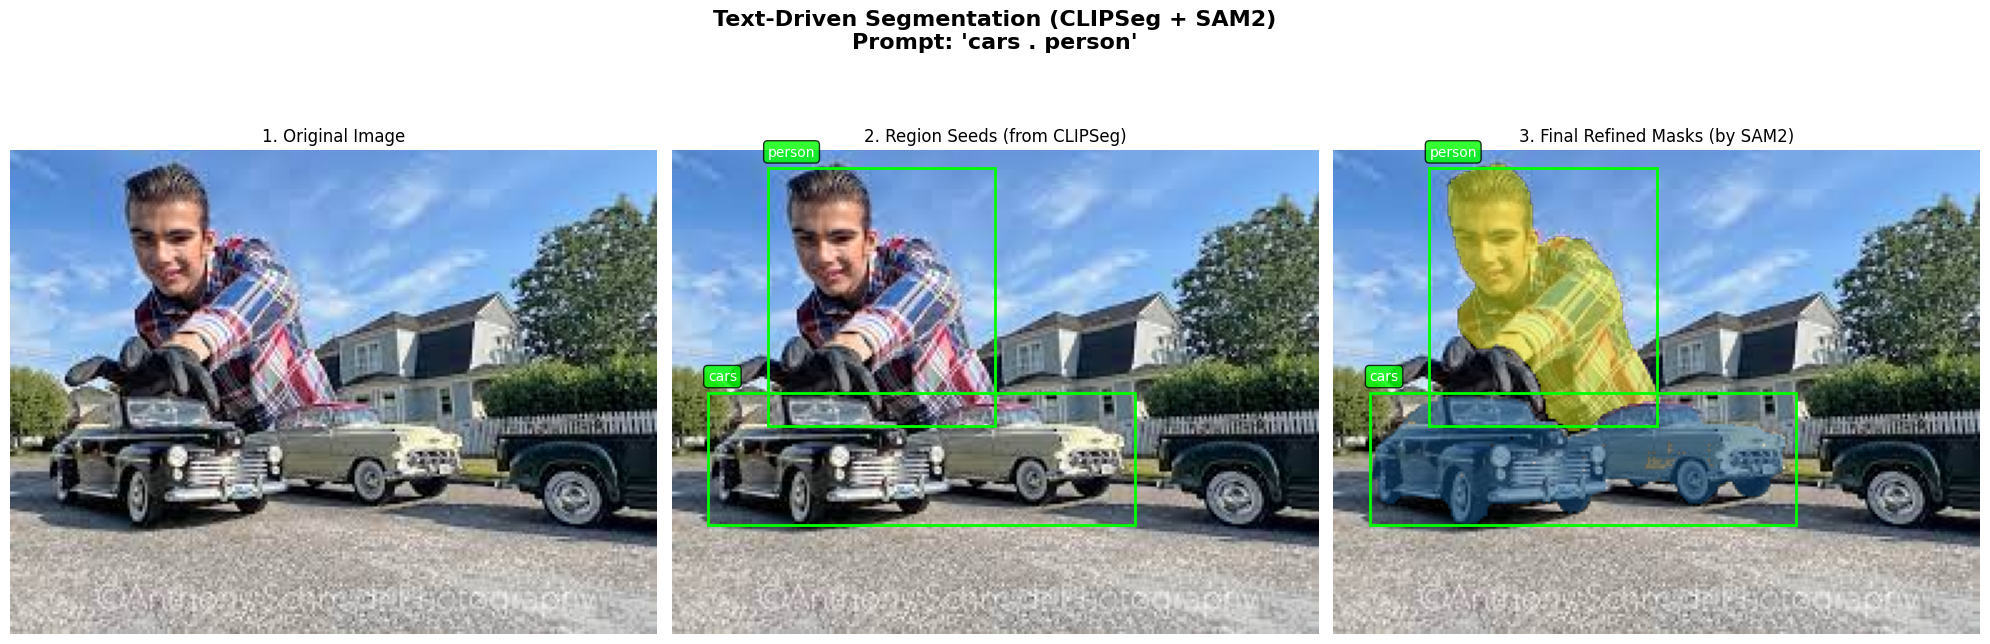


📊 Results Summary:
   • Objects found: 2
   • Phrases: cars, person
   • Average mask confidence: 0.944


In [43]:
# --- Interactive Mode ---
def interactive_segmentation():
    print("\n" + "="*70)
    print("🎮 INTERACTIVE SEGMENTATION MODE")
    print("="*70)

    CLIP_THRESHOLD = 0.5

    default_image = "https://images.pexels.com/photos/1662303/pexels-photo-1662303.jpeg?auto=compress&cs=tinysrgb&w=800"
    default_prompt = "person . dog"

    image_input = input(f"🖼️ Image path/URL (default provided):\n   ").strip() or default_image
    text_input = input(f"💬 Text prompt (default: '{default_prompt}'):\n   ").strip() or default_prompt

    try:
        clip_thresh = float(input(f"🔪 CLIPSeg Threshold [0-1] (default {CLIP_THRESHOLD}): ").strip() or CLIP_THRESHOLD)
    except ValueError:
        print(f"   ⚠️ Invalid input. Using default threshold ({CLIP_THRESHOLD}).")
        clip_thresh = CLIP_THRESHOLD

    print(f"\n🚀 Processing with CLIPSeg threshold: {clip_thresh}")
    segment_with_text_prompt(
        image_input, text_input,
        clip_threshold=clip_thresh
    )

# To run, uncomment the line below in your notebook
interactive_segmentation()



# Video_Segmentation

In [47]:
pip install yt-dlp imageio imageio-ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 95.7 MB/s  0:00:00


In [60]:
# --- 2. DOWNLOADS AND IMPORTS ---
import os
import sys
import wget
import subprocess
from io import BytesIO

import torch
import numpy as np
import cv2
from PIL import Image
import imageio
from tqdm import tqdm

from IPython.display import HTML
from base64 import b64encode

# Add the cloned SAM2 repository to the Python path
sys.path.append('segment-anything-2')

# Import the necessary model components
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
from hydra import initialize_config_dir
import hydra

# --- Download the SAM2 model checkpoint ---
os.makedirs("checkpoints", exist_ok=True)
sam2_checkpoint_url = "https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_large.pt"
sam2_checkpoint_path = "checkpoints/sam2.1_hiera_large.pt"

if not os.path.exists(sam2_checkpoint_path):
    print(f"Downloading SAM2 checkpoint...")
    wget.download(sam2_checkpoint_url, sam2_checkpoint_path)
    print("\n✓ Download complete.")
else:
    print("✓ SAM2 checkpoint already exists.")

# --- Setup device (GPU or CPU) ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

✓ SAM2 checkpoint already exists.
Using device: cuda


In [69]:
# --- 3. MODEL INITIALIZATION AND HELPER CLASSES ---
from typing import List
class TextToMaskSegmenter:
    """
    Encapsulates the logic for segmenting objects in an image using CLIPSeg and SAM2.
    """
    def __init__(self):
        # --- Initialize SAM2 ---
        print("🔄 Initializing SAM2...")
        try:
            hydra.core.global_hydra.GlobalHydra.instance().clear()
            config_dir = os.path.abspath("segment-anything-2/sam2/configs")
            initialize_config_dir(config_dir=config_dir, version_base=None)
            config_name = "sam2.1/sam2.1_hiera_l"
            sam2_model = build_sam2(config_name, sam2_checkpoint_path, device=device)
            self.sam_predictor = SAM2ImagePredictor(sam2_model)
            print("✅ SAM2 initialized.")
        except Exception as e:
            raise RuntimeError(f"SAM2 initialization failed: {e}")

        # --- Initialize CLIPSeg ---
        print("🔄 Initializing CLIPSeg...")
        try:
            self.clip_processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
            self.clip_model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)
            print("✅ CLIPSeg initialized.")
        except Exception as e:
            raise RuntimeError(f"CLIPSeg initialization failed: {e}")

    def segment_initial_objects(self, image_np: np.ndarray, text_prompt: str, clip_threshold=0.5, min_area_ratio=0.001) -> List[np.ndarray]:
        """
        Generates initial segmentation masks for ALL detected objects in the first frame.
        """
        print(f"🎯 Segmenting first frame with prompt: '{text_prompt}' to find all objects...")
        img_pil = Image.fromarray(image_np)
        h, w, _ = image_np.shape

        # 1. Use CLIPSeg to get a single rough heatmap for the entire class prompt (e.g., "cars")
        inputs = self.clip_processor(text=[text_prompt], images=[img_pil], padding="max_length", return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = self.clip_model(**inputs)
        heatmap = torch.sigmoid(outputs.logits).squeeze()

        # 2. Convert heatmap to a binary mask to find all distinct objects
        heatmap_resized = torch.nn.functional.interpolate(heatmap.unsqueeze(0).unsqueeze(0), size=(h, w), mode='bilinear', align_corners=False).squeeze()
        binary_mask = (heatmap_resized > clip_threshold).cpu().numpy().astype(np.uint8)

        # 3. Find all contours and filter out very small ones (noise)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        min_area = (h * w) * min_area_ratio
        significant_contours = [c for c in contours if cv2.contourArea(c) > min_area]

        if not significant_contours:
            raise ValueError(f"CLIPSeg failed to find any significant objects for '{text_prompt}' in the first frame.")

        print(f"✅ Found {len(significant_contours)} initial object(s).")

        # 4. For each significant contour, generate a high-quality SAM2 mask
        self.sam_predictor.set_image(image_np)
        initial_masks = []
        for contour in significant_contours:
            x, y, w_box, h_box = cv2.boundingRect(contour)
            box_prompt = np.array([x, y, x + w_box, y + h_box])
            refined_masks, _, _ = self.sam_predictor.predict(box=box_prompt, multimask_output=False)
            initial_masks.append(refined_masks[0])

        return initial_masks


class VideoObjectTracker:
    """
    Handles the multi-object video segmentation process from input to output.
    """
    def __init__(self, segmenter: TextToMaskSegmenter):
        self.segmenter = segmenter

    def _get_video_path(self, video_input: str) -> str:
        """Downloads video from URL or verifies local file path."""
        if video_input.startswith("http"):
            print(f"🔽 Downloading video...")
            output_path = 'downloaded_video.mp4'
            command = f"yt-dlp -o {output_path} -f 'best[height<=720]' --force-overwrite \"{video_input}\""
            try:
                subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
                print(f"✅ Video downloaded to {output_path}")
                return output_path
            except subprocess.CalledProcessError as e:
                raise RuntimeError(f"Video download failed: {e.stderr.decode()}")
        else:
            if not os.path.exists(video_input):
                raise FileNotFoundError(f"Video file not found at: {video_input}")
            return video_input

    def process_video(self, video_input: str, text_prompt: str, max_frames: int = 150):
        """
        Main method to track multiple objects through a video.
        """
        try:
            video_path = self._get_video_path(video_input)

            print("📖 Reading video frames...")
            reader = imageio.get_reader(video_path)
            fps = reader.get_meta_data()['fps']
            frames = [frame for frame in reader]
            reader.close()
            print(f"✅ Read {len(frames)} frames.")

            if len(frames) > max_frames:
                print(f"✂️ Video is long, trimming to the first {max_frames} frames for this demo.")
                frames = frames[:max_frames]

            first_frame = frames[0]
            # Get a LIST of initial masks, one for each object
            prev_masks = self.segmenter.segment_initial_objects(first_frame, text_prompt)

            # Assign a unique, random color to each tracked object
            colors = [np.random.rand(3) for _ in range(len(prev_masks))]

            output_frames = []
            h, w, _ = first_frame.shape

            for i, current_frame in enumerate(tqdm(frames, desc=" K Tracking objects frame-by-frame")):
                if current_frame.shape[0] != h or current_frame.shape[1] != w:
                    current_frame = cv2.resize(current_frame, (w, h), interpolation=cv2.INTER_AREA)

                self.segmenter.sam_predictor.set_image(current_frame)

                new_masks = []
                # Create a blank canvas for the combined colored overlay
                combined_overlay = np.zeros((h, w, 3), dtype=np.float32)

                # Loop through each object we are tracking from the previous frame
                for idx, prev_mask in enumerate(prev_masks):
                    contours, _ = cv2.findContours(prev_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                    if contours:
                        largest_contour = max(contours, key=cv2.contourArea)
                        x, y, w_box, h_box = cv2.boundingRect(largest_contour)
                        box_prompt = np.array([x, y, x + w_box, y + h_box])

                        masks_pred, _, _ = self.segmenter.sam_predictor.predict(box=box_prompt, multimask_output=False)
                        new_mask = masks_pred[0]
                        new_masks.append(new_mask)

                        # Add this object's colored mask to the combined overlay
                        combined_overlay += new_mask[..., np.newaxis] * colors[idx]
                    else:
                        # If object is lost, carry over its last known mask
                        new_masks.append(prev_mask)
                        combined_overlay += prev_mask[..., np.newaxis] * colors[idx]

                # Update the list of masks for the next frame's iteration
                prev_masks = new_masks

                # Apply the final combined overlay to the current frame
                alpha_mask = np.any(combined_overlay > 0, axis=2, keepdims=True).astype(np.float32)
                output_frame_float = current_frame * (1 - alpha_mask) + (np.clip(combined_overlay, 0, 1) * 255)
                output_frame = output_frame_float.astype(np.uint8)

                if output_frame.shape[0] != h or output_frame.shape[1] != w:
                    output_frame = cv2.resize(output_frame, (w, h), interpolation=cv2.INTER_AREA)

                output_frames.append(output_frame)

            output_video_path = "segmented_video.mp4"
            output_gif_path = "segmented_video.gif"

            print(f"\n✍️ Saving output files...")
            imageio.mimsave(output_video_path, output_frames, fps=fps)
            imageio.mimsave(output_gif_path, output_frames, fps=fps)

            return output_video_path, output_gif_path

        except (RuntimeError, FileNotFoundError, ValueError) as e:
            print(f"❌ An error occurred: {e}")
            return None, None

In [51]:
!pip install tqdm

In [ ]:
def run_interactive_video_segmentation():
    """
    Main interactive function to run the video segmentation pipeline.
    """
    print("\n" + "="*70)
    print("🎬 TEXT-DRIVEN VIDEO SEGMENTATION")
    print("="*70)

    # Initialize the models. This is done once.
    try:
        segmenter = TextToMaskSegmenter()
        tracker = VideoObjectTracker(segmenter)
    except RuntimeError as e:
        print(f"❌ Failed to initialize models: {e}")
        return

    default_video = "https://www.pexels.com/video/a-woman-riding-a-horse-on-the-beach-3844933/"
    default_prompt = "horse"

    video_input = input(f"📹 Enter Video URL or Path in Drive (press Enter for default horse video):\n   ").strip() or default_video
    text_prompt = input(f"💬 Enter a text prompt for the object to track (press Enter for '{default_prompt}'):\n   ").strip() or default_prompt

    output_mp4, output_gif = tracker.process_video(video_input, text_prompt)

    if output_mp4:
        print("\n🎉 Video processing successful!")
        print(f"   • Output MP4 saved to: {output_mp4}")
        print(f"   • Output GIF saved to:  {output_gif}")

        print("\n🎞️ Displaying output video preview:")
        mp4 = open(output_mp4,'rb').read()
        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
        display(HTML(f"""
        <video width=500 controls loop autoplay>
              <source src="{data_url}" type="video/mp4">
        </video>
        """))

# --- Run the interactive session ---
run_interactive_video_segmentation()


🎬 TEXT-DRIVEN VIDEO SEGMENTATION
🔄 Initializing SAM2...
✅ SAM2 initialized.
🔄 Initializing CLIPSeg...
✅ CLIPSeg initialized.
📹 Enter Video URL or Path in Drive (press Enter for default horse video):
   /content/drive/MyDrive/images/video.mp4
💬 Enter a text prompt for the object to track (press Enter for 'horse'):
   cars
📖 Reading video frames...
✅ Read 1501 frames.
✂️ Video is long, trimming to the first 150 frames for this demo.
🎯 Segmenting first frame with prompt: 'cars' to find all objects...
✅ Found 3 initial object(s).


 K Tracking objects frame-by-frame:   0%|          | 0/150 [00:00<?, ?it/s]/tmp/ipython-input-850339319.py:156: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  output_frame_float = current_frame * (1 - alpha_mask) + (np.clip(combined_overlay, 0, 1) * 255)
 K Tracking objects frame-by-frame: 100%|██████████| 150/150 [02:05<00:00,  1.20it/s]



✍️ Saving output files...
